In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/브랜드마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
1,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
2,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
3,메타구글네이버카카오 등 Paid 매체 광고 운영 광고 매체별 데이터 분석 및 인사...,D2C 커머스 퍼포먼스 마케팅 경력 1년 이상 메타구글네이버카카오 등의 Paid ...
4,메타구글카카오GFA 등 광고 채널 관리 퍼포먼스 광고 집행관리 인플루언서 바이럴 ...,경력 년수 무관 메타자사몰 광고마케팅 등 다양한 매체 경험이 있는 분 엑셀문서 정...
...,...,...
190,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
191,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 ...,전략과 실행 간 끊김 없는 종합적인 브랜딩을 경험하기 원하시는 분전략적 사고 창의적...
192,브랜딩을 목적으로 방향성을 설정하고 전반적인 기획 및 판매 업무를 담당합니다제품 기...,학력무관 동종업계 3년 이상 근무인턴계약 종료 후 정규직 전환시 결격사유가 없으신 ...
193,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...
1,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...
2,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...
3,메타구글네이버카카오 등 Paid 매체 광고 운영 광고 매체별 데이터 분석 및 인사...
4,메타구글카카오GFA 등 광고 채널 관리 퍼포먼스 광고 집행관리 인플루언서 바이럴 ...
...,...
190,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...
191,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 ...
192,브랜딩을 목적으로 방향성을 설정하고 전반적인 기획 및 판매 업무를 담당합니다제품 기...
193,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/브랜드마케팅(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 및 매체 집행 타사 제품 및 시장 리서치 비교 분석 기획 운영 등 내부 멤버들과의 민첩한 커뮤니케이션\nCRM 마케터 및 디지털 마케터  글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 소비자 저니 및 마케팅 전략 수립 아큐브 시슬리코리아 등  CRM 운영 SFMC 및 CDP 활용   목적에 맞는 채널 선정 및 CRM 기획 및 발송  CRM을 활용한 캠페인 기획 및 실행   데이터를 활용한 CRM 전략 수립  다양한 AB테스트를 진행하고 성과 분석을 통한 효율 개선 \n1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그 콘텐츠 등록 주 12회3 피처링 솔루션 고객 대상 뉴스레터 발송 주12회4 외부 블로그뉴스레터 관리 5 인플루언서 커머스 판매 페이지 제작 \n 메타구글네이버카카오 등 Paid 매체 광고 운영 광고 매체별 데이터 분석 및 인사이트 도출 운영 최적화 미디어믹스 및 마케팅 전략 기획\n 메타구글카카오GFA 등 광고 채널 관리 퍼포먼스 광고 집행관리 인플루언서 바이럴 마케팅 판매광고 채널별 입점 및 기획 광고컨텐츠 소재 기획 및 실행 마케팅 성과분석\nApp 및 Web 서비스의 마케팅 전략 수립마케팅 커뮤니케이션 실행디지털프로모션 등트렌드 모니터링소셜 분석 등을 통한 마케팅 인사이트 도출\n사용자 유입을 위한 카드 뉴스 영상 콘텐츠 시리즈단발성 등 기획 및 제작앱 서비스 확장을 위한 마케팅 콘텐츠 기획 및 제작콘텐츠 정량지표 관리 및 분석시장 트렌드 및 데이터 분석을 통한 콘텐츠 방향성 도출온드미디어Owned Media 운영 전략 수립 및 관리 홈페이지 SNS\n User Acquisition을 위한 광고 캠페인 기획운영FB IG Google 등 매체캠페인크리에이티브별 성과 데이터 분석을 통한 효율 최적화 Tracking Tool을 활용한 데이터 분석 및 인사이트 도출Appsflyer Amplitude GA 자체 서버데이터

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '파워',
 '볼',
 '게임',
 '시장',
 '분석',
 '및',
 '단계',
 '별',
 '브랜딩',
 '전략',
 '수립',
 '전반',
 '게임',
 '광고',
 '기획',
 '제작',
 '및',
 '매체',
 '집행',
 '제품',
 '및',
 '시장',
 '리서치',
 '비교',
 '분석',
 '기획',
 '운영',
 '등',
 '내부',
 '멤버',
 '커뮤니케이션',
 '마케터',
 '및',
 '디지털',
 '마케터',
 '글로벌',
 '브랜드',
 '이탈',
 '방지',
 '구매',
 '유도',
 '리',
 '텐션',
 '등',
 '소비자',
 '저니',
 '및',
 '마케팅',
 '전략',
 '수립',
 '큐브',
 '시슬리',
 '코리아',
 '등',
 '운영',
 '및',
 '활용',
 '목적',
 '채널',
 '선정',
 '및',
 '기획',
 '및',
 '발송',
 '활용',
 '캠페인',
 '기획',
 '및',
 '실행',
 '데이터',
 '활용',
 '전략',
 '수립',
 '테스트',
 '진행',
 '성과',
 '분석',
 '통한',
 '효율',
 '개선',
 '국내외',
 '인',
 '플루',
 '마케팅',
 '시장',
 '동향',
 '리서치',
 '및',
 '분석',
 '피처링',
 '웹사이트',
 '내',
 '블로그',
 '콘텐츠',
 '등록',
 '주',
 '피처링',
 '솔루션',
 '고객',
 '대상',
 '뉴스레터',
 '발송',
 '주',
 '외부',
 '블로그',
 '뉴스레터',
 '관리',
 '인',
 '플루',
 '커머스',
 '판매',
 '페이지',
 '제작',
 '메타',
 '구글',
 '네이버',
 '카카오',
 '등',
 '매체',
 '광고',
 '운영',
 '광고',
 '매체',
 '별',
 '데이터',
 '분석',
 '및',
 '인사이트',
 '도출',
 '운영',
 '최적화',
 '미디어믹스',
 '및',
 '마케팅',
 '전략',
 '기획',
 '메타',
 '구글',


In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

7985
706


FreqDist({'및': 582, '기획': 365, '브랜드': 263, '마케팅': 214, '운영': 211, '콘텐츠': 162, '전략': 161, '관리': 159, '등': 138, '수립': 127, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '파워',
 '볼',
 '게임',
 '시장',
 '분석',
 '단계',
 '별',
 '브랜딩',
 '전략',
 '전반',
 '게임',
 '광고',
 '기획',
 '매체',
 '집행',
 '제품',
 '시장',
 '리서치',
 '비교',
 '분석',
 '기획',
 '운영',
 '내부',
 '멤버',
 '커뮤니케이션',
 '마케터',
 '마케터',
 '글로벌',
 '브랜드',
 '이탈',
 '방지',
 '구매',
 '유도',
 '리',
 '텐션',
 '소비자',
 '저니',
 '마케팅',
 '전략',
 '큐브',
 '시슬리',
 '코리아',
 '운영',
 '활용',
 '목적',
 '채널',
 '선정',
 '기획',
 '발송',
 '활용',
 '캠페인',
 '기획',
 '데이터',
 '활용',
 '전략',
 '테스트',
 '진행',
 '성과',
 '분석',
 '통한',
 '효율',
 '개선',
 '국내외',
 '마케팅',
 '시장',
 '동향',
 '리서치',
 '분석',
 '피처링',
 '웹사이트',
 '블로그',
 '콘텐츠',
 '등록',
 '주',
 '피처링',
 '솔루션',
 '고객',
 '대상',
 '뉴스레터',
 '발송',
 '주',
 '외부',
 '블로그',
 '뉴스레터',
 '관리',
 '커머스',
 '판매',
 '페이지',
 '메타',
 '구글',
 '네이버',
 '카카오',
 '매체',
 '광고',
 '운영',
 '광고',
 '매체',
 '별',
 '데이터',
 '분석',
 '인사이트',
 '도출',
 '운영',
 '최적화',
 '미디어믹스',
 '마케팅',
 '전략',
 '기획',
 '메타',
 '구글',
 '카카오',
 '광고',
 '채널',
 '관리',
 '퍼포먼스',
 '광고',
 '집행',
 '관리',
 '바이럴',
 '마케팅',
 '판매',
 '광고',
 '채널',
 '별',
 '입점',
 '기획',
 '광고',
 '컨텐츠',
 '소재',
 '기획',
 '마케팅',
 '성과',
 '분석',
 '서비스',
 '마케팅',
 '

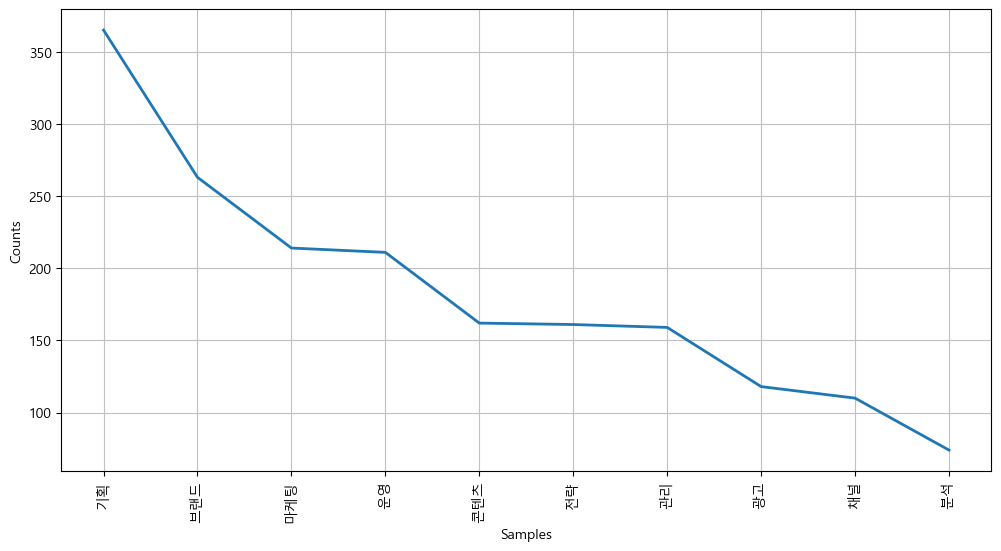

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

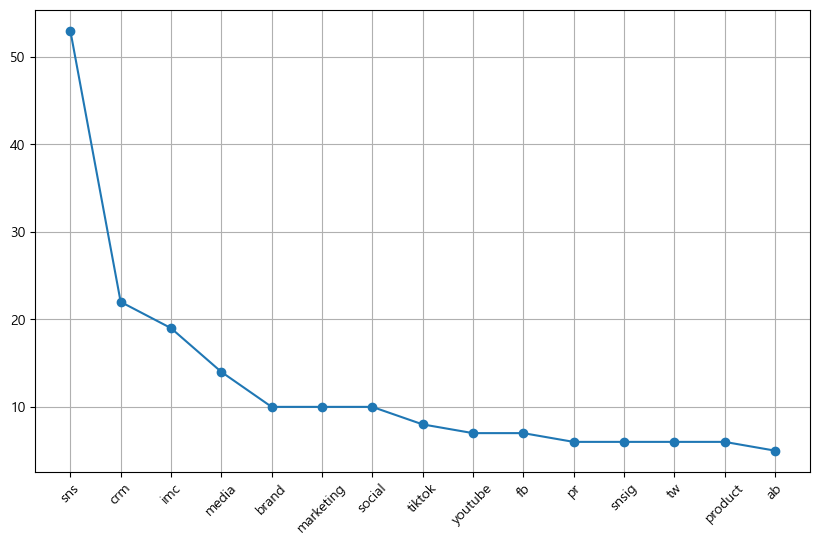

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)